In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read cvs file 
dfx = pd.read_csv('../csv_files/p2stdev.csv', index_col=0)
dfx.head()

,C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,...,S3,C5p,LongSentences,RealWords,LongWords,PositiveWords,NegativeWords,UncertainWords,C2,C3p
0,2.227033,1.488400,0.029074,17.528157,16.176365,1.927893,21.679483,112.778544,107.517440,17.349352,...,2.275984,1.351792,0.640426,0.646515,0.615270,0.169556,0.209529,0.221915,1.0,0
1,2.524740,0.963174,-0.013352,17.178286,14.690979,1.720483,28.124722,147.621137,139.946418,22.583180,...,2.487662,2.487306,0.644753,0.641182,0.609752,0.148247,0.223103,0.221556,0.0,1
2,2.116933,0.806476,0.020715,16.639604,15.424948,1.395264,14.177447,72.539644,69.173694,11.313708,...,1.978602,1.214656,0.636816,0.646763,0.628717,0.226322,0.184411,0.225078,1.0,1
3,2.436077,0.647103,0.020023,16.513419,15.319588,1.429303,18.110770,90.879040,87.028731,13.304135,...,2.188931,1.193831,0.539634,0.650793,0.628490,0.213167,0.192593,0.237040,1.0,1
4,2.075782,0.067659,-0.034895,17.241131,15.925724,2.929681,23.916521,121.778487,114.786759,18.330303,...,2.346674,1.315407,0.587413,0.635767,0.603993,0.165315,0.215782,0.224143,1.0,0


In [3]:
# filter out binary variables
dfbinary = dfx.filter(['C2','C3p'])
dfbinary.head()

,C2,C3p
0,1.0,0
1,0.0,1
2,1.0,1
3,1.0,1
4,1.0,0


In [4]:
# drop binary variables from dfx dataframe
dfx = dfx.drop(labels=['C2', 'C3p'],axis=1)
dfx.head()

,C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,...,S1,S2,S3,C5p,LongSentences,RealWords,LongWords,PositiveWords,NegativeWords,UncertainWords
0,2.227033,1.488400,0.029074,17.528157,16.176365,1.927893,21.679483,112.778544,107.517440,17.349352,...,3.957892,2.211554,2.275984,1.351792,0.640426,0.646515,0.615270,0.169556,0.209529,0.221915
1,2.524740,0.963174,-0.013352,17.178286,14.690979,1.720483,28.124722,147.621137,139.946418,22.583180,...,4.140818,2.496333,2.487662,2.487306,0.644753,0.641182,0.609752,0.148247,0.223103,0.221556
2,2.116933,0.806476,0.020715,16.639604,15.424948,1.395264,14.177447,72.539644,69.173694,11.313708,...,3.936497,1.790959,1.978602,1.214656,0.636816,0.646763,0.628717,0.226322,0.184411,0.225078
3,2.436077,0.647103,0.020023,16.513419,15.319588,1.429303,18.110770,90.879040,87.028731,13.304135,...,4.308869,1.973068,2.188931,1.193831,0.539634,0.650793,0.628490,0.213167,0.192593,0.237040
4,2.075782,0.067659,-0.034895,17.241131,15.925724,2.929681,23.916521,121.778487,114.786759,18.330303,...,4.061548,2.302490,2.346674,1.315407,0.587413,0.635767,0.603993,0.165315,0.215782,0.224143


In [5]:
dfx.skew()

C1                0.560111
C3                2.131771
C4               -0.347592
C5                0.582590
C6                0.480233
C7                0.553231
T1                0.300853
T2                0.279520
T3                0.275906
T4                0.244081
T5                0.292337
S1                0.320680
S2                0.423289
S3                0.137653
C5p               0.166784
LongSentences    -0.112393
RealWords         0.193107
LongWords        -0.291604
PositiveWords     0.131535
NegativeWords     0.354812
UncertainWords    0.461097
dtype: float64

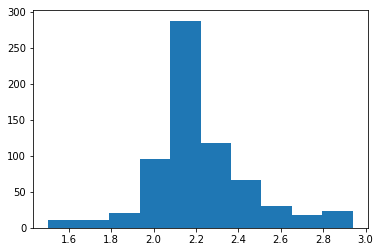

In [6]:
# show distribution of one column
# notice the scale on the x-axis is not 0 to 1
plt.hist(dfx['C1'])
plt.show()

In [7]:
# import the preprocessing package from sklearn 
from sklearn import preprocessing
# define column names
names = dfx.columns

# create scaler variable 
scaler = preprocessing.StandardScaler()

# fit and scale data 
dfxstandard = scaler.fit_transform(dfx)
dfxstandard = pd.DataFrame(dfxstandard, columns=names)

In [8]:
# check if data was scaled correctly
# mean and stdev should be equal to or almost equal to 0 and 1 respectively 
dfxstandard.describe()

,C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,...,S1,S2,S3,C5p,LongSentences,RealWords,LongWords,PositiveWords,NegativeWords,UncertainWords
count,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,...,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02
mean,4.349730e-16,-5.339489e-17,-5.209258e-18,-6.719942e-16,2.180074e-15,-1.198129e-16,5.131119e-16,6.960870e-16,2.083703e-17,-4.492985e-16,...,-7.996210e-16,7.188775e-16,7.423192e-17,2.526490e-16,3.906943e-17,6.120878e-16,-6.094831e-16,7.983187e-16,8.647368e-16,-2.734860e-17
std,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,...,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00
min,-3.003061e+00,-8.021094e-01,-3.046376e+00,-2.666785e+00,-3.027891e+00,-2.399915e+00,-2.623841e+00,-3.088699e+00,-3.110615e+00,-3.078628e+00,...,-3.105803e+00,-2.625262e+00,-3.010862e+00,-3.102103e+00,-3.298472e+00,-7.664680e+00,-7.097014e+00,-3.524817e+00,-3.339817e+00,-3.579624e+00
25%,-5.153933e-01,-6.081212e-01,-6.437258e-01,-6.303183e-01,-6.616744e-01,-5.786323e-01,-6.631387e-01,-6.582336e-01,-6.746380e-01,-6.632239e-01,...,-5.977881e-01,-6.266902e-01,-7.087789e-01,-5.790170e-01,-6.788185e-01,-2.084771e-01,-5.210960e-01,-6.122202e-01,-6.705572e-01,-6.559391e-01
50%,-1.713321e-01,-3.430644e-01,5.185370e-02,-1.545532e-01,-1.380686e-01,-1.173100e-01,-3.332547e-02,-3.290453e-02,-2.833402e-02,-2.933190e-02,...,-7.172892e-02,-7.218204e-02,-1.127713e-03,-1.739843e-02,8.814044e-03,1.104490e-01,3.001249e-02,-5.685988e-02,-5.355699e-02,1.740494e-03
75%,3.874430e-01,1.458215e-01,7.270006e-01,5.833835e-01,5.021344e-01,4.899995e-01,6.146302e-01,5.854943e-01,6.151895e-01,6.059870e-01,...,6.301760e-01,5.775196e-01,6.453857e-01,5.384331e-01,6.512552e-01,4.031261e-01,5.425222e-01,6.045883e-01,5.953648e-01,5.456494e-01
max,3.021539e+00,3.440170e+00,2.644349e+00,3.085658e+00,3.118784e+00,3.072691e+00,3.130818e+00,3.170061e+00,3.186482e+00,3.141941e+00,...,3.166048e+00,3.091841e+00,3.105284e+00,3.376582e+00,3.507759e+00,1.354045e+01,9.811768e+00,3.949526e+00,3.532901e+00,4.297564e+00


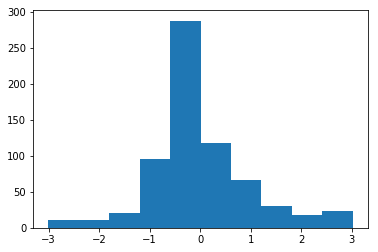

In [9]:
# notice different scale on the x-axis
# data has bee scaled correctly 
plt.hist(dfxstandard['C1'])
plt.show()

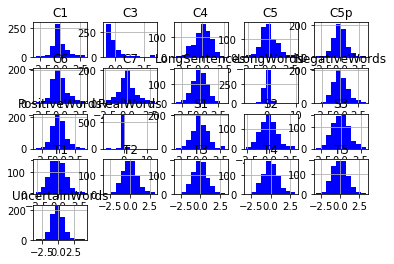

In [10]:
# examine distribution for all variables 
for col in dfxstandard.columns:
    dfxstandard.hist(color='blue') #, range=(-2,2))
    break
plt.show()

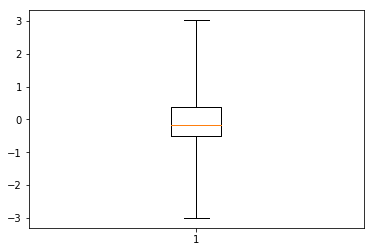

In [11]:
# use boxplots as another way to check if the variables have been scaled correctly
# mean line should line up with the 0 tick mark on the left axis 
plt.boxplot(dfxstandard['C1'], whis='range')
plt.show()

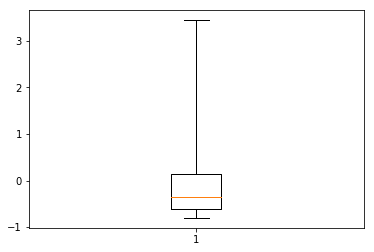

In [12]:
plt.boxplot(dfxstandard['C3'], whis='range')
plt.show()

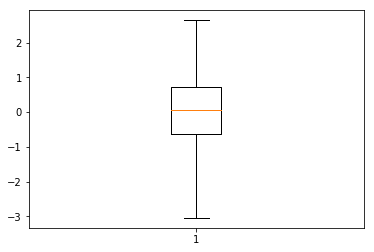

In [13]:
plt.boxplot(dfxstandard['C4'], whis='range')
plt.show()

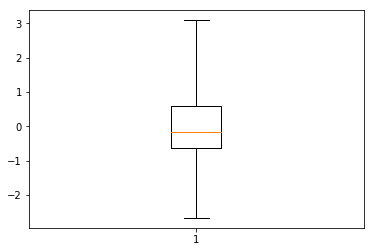

In [14]:
plt.boxplot(dfxstandard['C5'], whis='range')
plt.show()

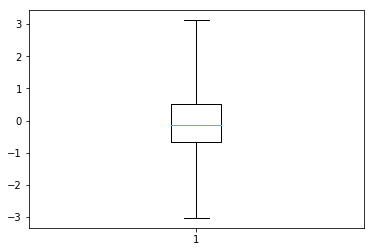

In [15]:
plt.boxplot(dfxstandard['C6'], whis='range')
plt.show()

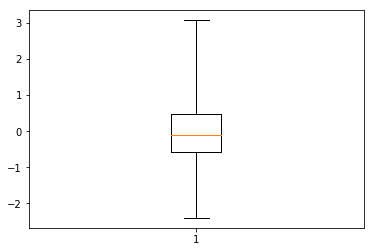

In [16]:
plt.boxplot(dfxstandard['C7'], whis='range')
plt.show()

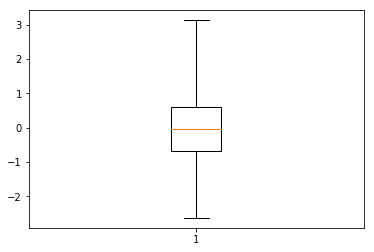

In [17]:
plt.boxplot(dfxstandard['T1'], whis='range')
plt.show()

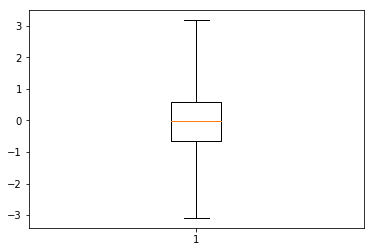

In [18]:
plt.boxplot(dfxstandard['T2'], whis='range')
plt.show()

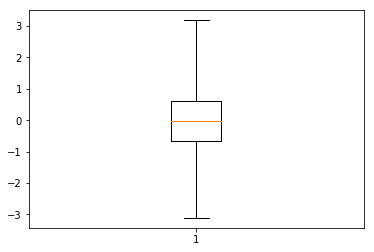

In [19]:
plt.boxplot(dfxstandard['T3'], whis='range')
plt.show()

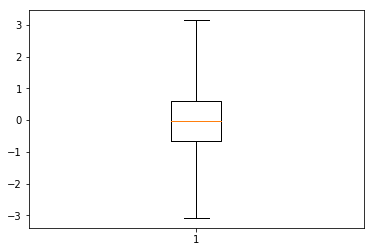

In [20]:
plt.boxplot(dfxstandard['T4'], whis='range')
plt.show()

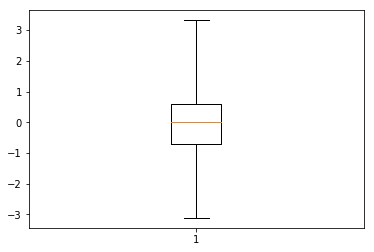

In [21]:
plt.boxplot(dfxstandard['T5'], whis='range')
plt.show()

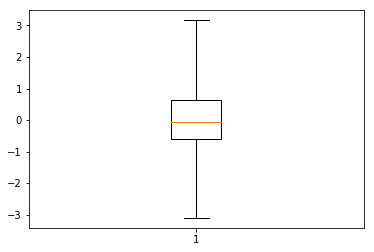

In [22]:
plt.boxplot(dfxstandard['S1'], whis='range')
plt.show()

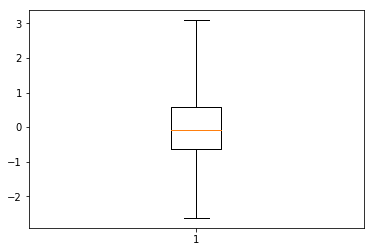

In [23]:
plt.boxplot(dfxstandard['S2'], whis='range')
plt.show()

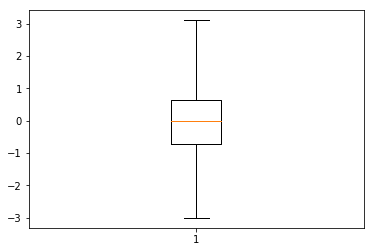

In [24]:
plt.boxplot(dfxstandard['S3'], whis='range')
plt.show()

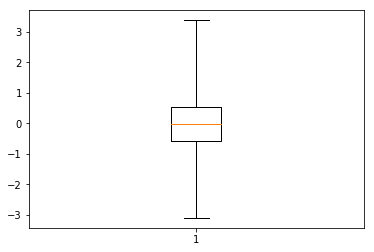

In [25]:
plt.boxplot(dfxstandard['C5p'], whis='range')
plt.show()

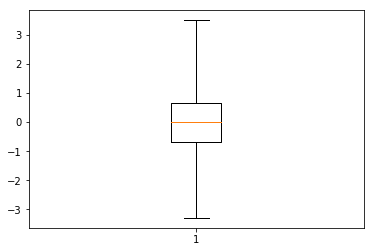

In [26]:
plt.boxplot(dfxstandard['LongSentences'], whis='range')
plt.show()

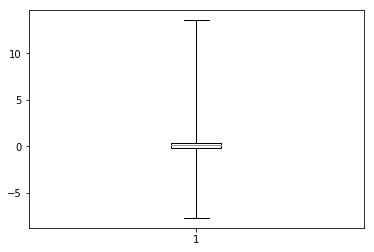

In [27]:
plt.boxplot(dfxstandard['RealWords'], whis='range')
plt.show()

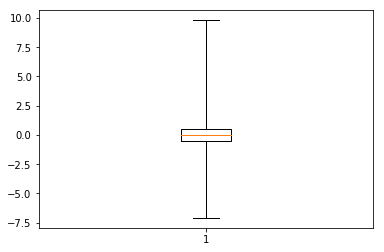

In [28]:
plt.boxplot(dfxstandard['LongWords'], whis='range')
plt.show()

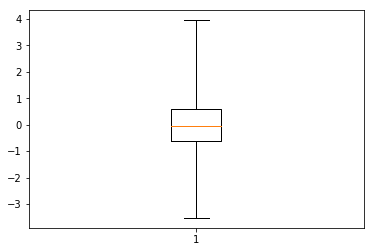

In [29]:
plt.boxplot(dfxstandard['PositiveWords'], whis='range')
plt.show()

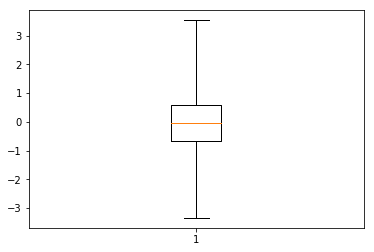

In [30]:
plt.boxplot(dfxstandard['NegativeWords'], whis='range')
plt.show()

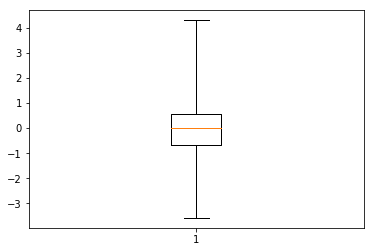

In [31]:
plt.boxplot(dfxstandard['UncertainWords'], whis='range')
plt.show()

In [32]:
# concat dfxstandard with dfbinary to create an updated dfx dataframe
dfx = pd.concat([dfxstandard, dfbinary], axis=1)
dfx.head()

,C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,...,S3,C5p,LongSentences,RealWords,LongWords,PositiveWords,NegativeWords,UncertainWords,C2,C3p
0,0.030756,0.712586,0.669243,0.349506,0.343380,-0.477847,0.131093,0.103796,0.147542,0.165663,...,0.089906,0.056127,0.168742,0.385070,0.310826,-0.146970,0.165628,-0.128062,1.0,0
1,1.279824,0.178082,-0.643726,-0.089084,-1.645602,-0.789310,1.873545,1.676347,1.703068,1.745347,...,1.480823,2.434275,0.229402,0.151494,-0.016168,-1.240880,0.781633,-0.147676,0.0,1
2,-0.431183,0.018615,0.410546,-0.764364,-0.662792,-1.277684,-1.897061,-1.712308,-1.691699,-1.656026,...,-1.864154,-0.231083,0.118150,0.395935,1.107680,2.767209,-0.974221,0.044649,1.0,1
3,0.907828,-0.143574,0.389135,-0.922547,-0.803873,-1.226569,-0.833698,-0.884595,-0.835244,-1.055272,...,-0.482106,-0.274697,-1.243939,0.572453,1.094210,2.091907,-0.602916,0.697829,1.0,1
4,-0.603838,-0.733255,-1.310426,-0.010303,0.007764,1.026514,0.735870,0.509990,0.496230,0.461735,...,0.554405,-0.020075,-0.574282,-0.085718,-0.357465,-0.364704,0.449384,-0.006421,1.0,0


In [33]:
# verify that the correct values are being used in the new dataframe
dfx.describe()

,C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,...,S3,C5p,LongSentences,RealWords,LongWords,PositiveWords,NegativeWords,UncertainWords,C2,C3p
count,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,...,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,682.000000,682.000000
mean,4.349730e-16,-5.339489e-17,-5.209258e-18,-6.719942e-16,2.180074e-15,-1.198129e-16,5.131119e-16,6.960870e-16,2.083703e-17,-4.492985e-16,...,7.423192e-17,2.526490e-16,3.906943e-17,6.120878e-16,-6.094831e-16,7.983187e-16,8.647368e-16,-2.734860e-17,0.863636,0.463343
std,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,...,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,0.343426,0.499020
min,-3.003061e+00,-8.021094e-01,-3.046376e+00,-2.666785e+00,-3.027891e+00,-2.399915e+00,-2.623841e+00,-3.088699e+00,-3.110615e+00,-3.078628e+00,...,-3.010862e+00,-3.102103e+00,-3.298472e+00,-7.664680e+00,-7.097014e+00,-3.524817e+00,-3.339817e+00,-3.579624e+00,0.000000,0.000000
25%,-5.153933e-01,-6.081212e-01,-6.437258e-01,-6.303183e-01,-6.616744e-01,-5.786323e-01,-6.631387e-01,-6.582336e-01,-6.746380e-01,-6.632239e-01,...,-7.087789e-01,-5.790170e-01,-6.788185e-01,-2.084771e-01,-5.210960e-01,-6.122202e-01,-6.705572e-01,-6.559391e-01,1.000000,0.000000
50%,-1.713321e-01,-3.430644e-01,5.185370e-02,-1.545532e-01,-1.380686e-01,-1.173100e-01,-3.332547e-02,-3.290453e-02,-2.833402e-02,-2.933190e-02,...,-1.127713e-03,-1.739843e-02,8.814044e-03,1.104490e-01,3.001249e-02,-5.685988e-02,-5.355699e-02,1.740494e-03,1.000000,0.000000
75%,3.874430e-01,1.458215e-01,7.270006e-01,5.833835e-01,5.021344e-01,4.899995e-01,6.146302e-01,5.854943e-01,6.151895e-01,6.059870e-01,...,6.453857e-01,5.384331e-01,6.512552e-01,4.031261e-01,5.425222e-01,6.045883e-01,5.953648e-01,5.456494e-01,1.000000,1.000000
max,3.021539e+00,3.440170e+00,2.644349e+00,3.085658e+00,3.118784e+00,3.072691e+00,3.130818e+00,3.170061e+00,3.186482e+00,3.141941e+00,...,3.105284e+00,3.376582e+00,3.507759e+00,1.354045e+01,9.811768e+00,3.949526e+00,3.532901e+00,4.297564e+00,1.000000,1.000000


In [34]:
# read in y variables csv file
dfy = pd.read_csv('../csv_files/y.csv', index_col=0)
dfy.head()

,pIPO,pH,pL,p1day,Pmid,Y1,Y2,C6p
0,10.0,9.5,8.5,11.870000,9.0,0,1,11.111111
1,8.0,10.0,8.0,7.250000,9.0,1,0,0.000000
2,7.0,14.0,12.0,6.700000,13.0,1,0,0.000000
3,11.5,16.0,14.0,12.390000,15.0,1,1,0.000000
4,21.0,21.0,19.0,56.599998,20.0,0,1,5.000000


In [35]:
# read in id csv file
dfid = pd.read_csv('../csv_files/id.csv', index_col=0)
dfid.head()

,I1,I2,I3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834
2,ACAD,ACADIA PHARMACEUTICALS INC,2834
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492


In [36]:
# concat dfid and dfy
df = pd.concat([dfid, dfy], axis=1)
df.head()

,I1,I2,I3,pIPO,pH,pL,p1day,Pmid,Y1,Y2,C6p
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,9.0,0,1,11.111111
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,9.0,1,0,0.000000
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,13.0,1,0,0.000000
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,15.0,1,1,0.000000
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,20.0,0,1,5.000000


In [37]:
# concat df and dfx to get the full dataframe
df = pd.concat([df, dfx], axis=1)
df.head()

,I1,I2,I3,pIPO,pH,pL,p1day,Pmid,Y1,Y2,...,S3,C5p,LongSentences,RealWords,LongWords,PositiveWords,NegativeWords,UncertainWords,C2,C3p
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,9.0,0,1,...,0.089906,0.056127,0.168742,0.385070,0.310826,-0.146970,0.165628,-0.128062,1.0,0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,9.0,1,0,...,1.480823,2.434275,0.229402,0.151494,-0.016168,-1.240880,0.781633,-0.147676,0.0,1
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,13.0,1,0,...,-1.864154,-0.231083,0.118150,0.395935,1.107680,2.767209,-0.974221,0.044649,1.0,1
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,15.0,1,1,...,-0.482106,-0.274697,-1.243939,0.572453,1.094210,2.091907,-0.602916,0.697829,1.0,1
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,20.0,0,1,...,0.554405,-0.020075,-0.574282,-0.085718,-0.357465,-0.364704,0.449384,-0.006421,1.0,0


In [38]:
# export total dataframe 
df.to_csv('../csv_files/p2final.csv')

In [39]:
# export only dfx dataframe 
dfx.to_csv('../csv_files/p2zscorex.csv')